In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('Dataset\car data.csv')

In [3]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
dataset.shape

(301, 9)

## To see how many categories of data is there for the categorical columns

In [5]:
print(dataset['Fuel_Type'].unique())
print(dataset['Seller_Type'].unique())
print(dataset['Transmission'].unique())
print(dataset['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


## To check Null values

In [6]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
dataset.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

## Deleting Car name For our dataset as its not influential to our dependent variable

In [8]:
del dataset['Car_Name']

In [9]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## To Change The Year column to determine how old our car is

In [10]:
dataset['Current_Year'] = 2022

In [11]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


### Subtracting Current Year To Car's mfg year

In [12]:
dataset['No_Of_Year'] = dataset['Current_Year']  - dataset['Year']

In [13]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Of_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [14]:
del dataset['Year']

In [15]:
# axis = 1 for column and inplcae = True For changing the existing Dataset
# By Default its false and does not changes the deafult dataset (used to assign to new dataset)
dataset.drop(['Current_Year'], axis = 1, inplace = True)

In [16]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


## To Apply One Hot Encoding On Our Categorical Attributes

### We add dummy variables use 'get_dummies' of pandas instead of scikit learn

'drop_first' = True drops the first column of the dummy columns to prevent dummy variabble trap

In [17]:
dataset = pd.get_dummies(dataset, drop_first = True)

In [18]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


## Now to See the correlation between our attributes

In [19]:
dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Of_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


## To view our correlation in a diagramatic way we use seaborn

In [20]:
import seaborn as sns

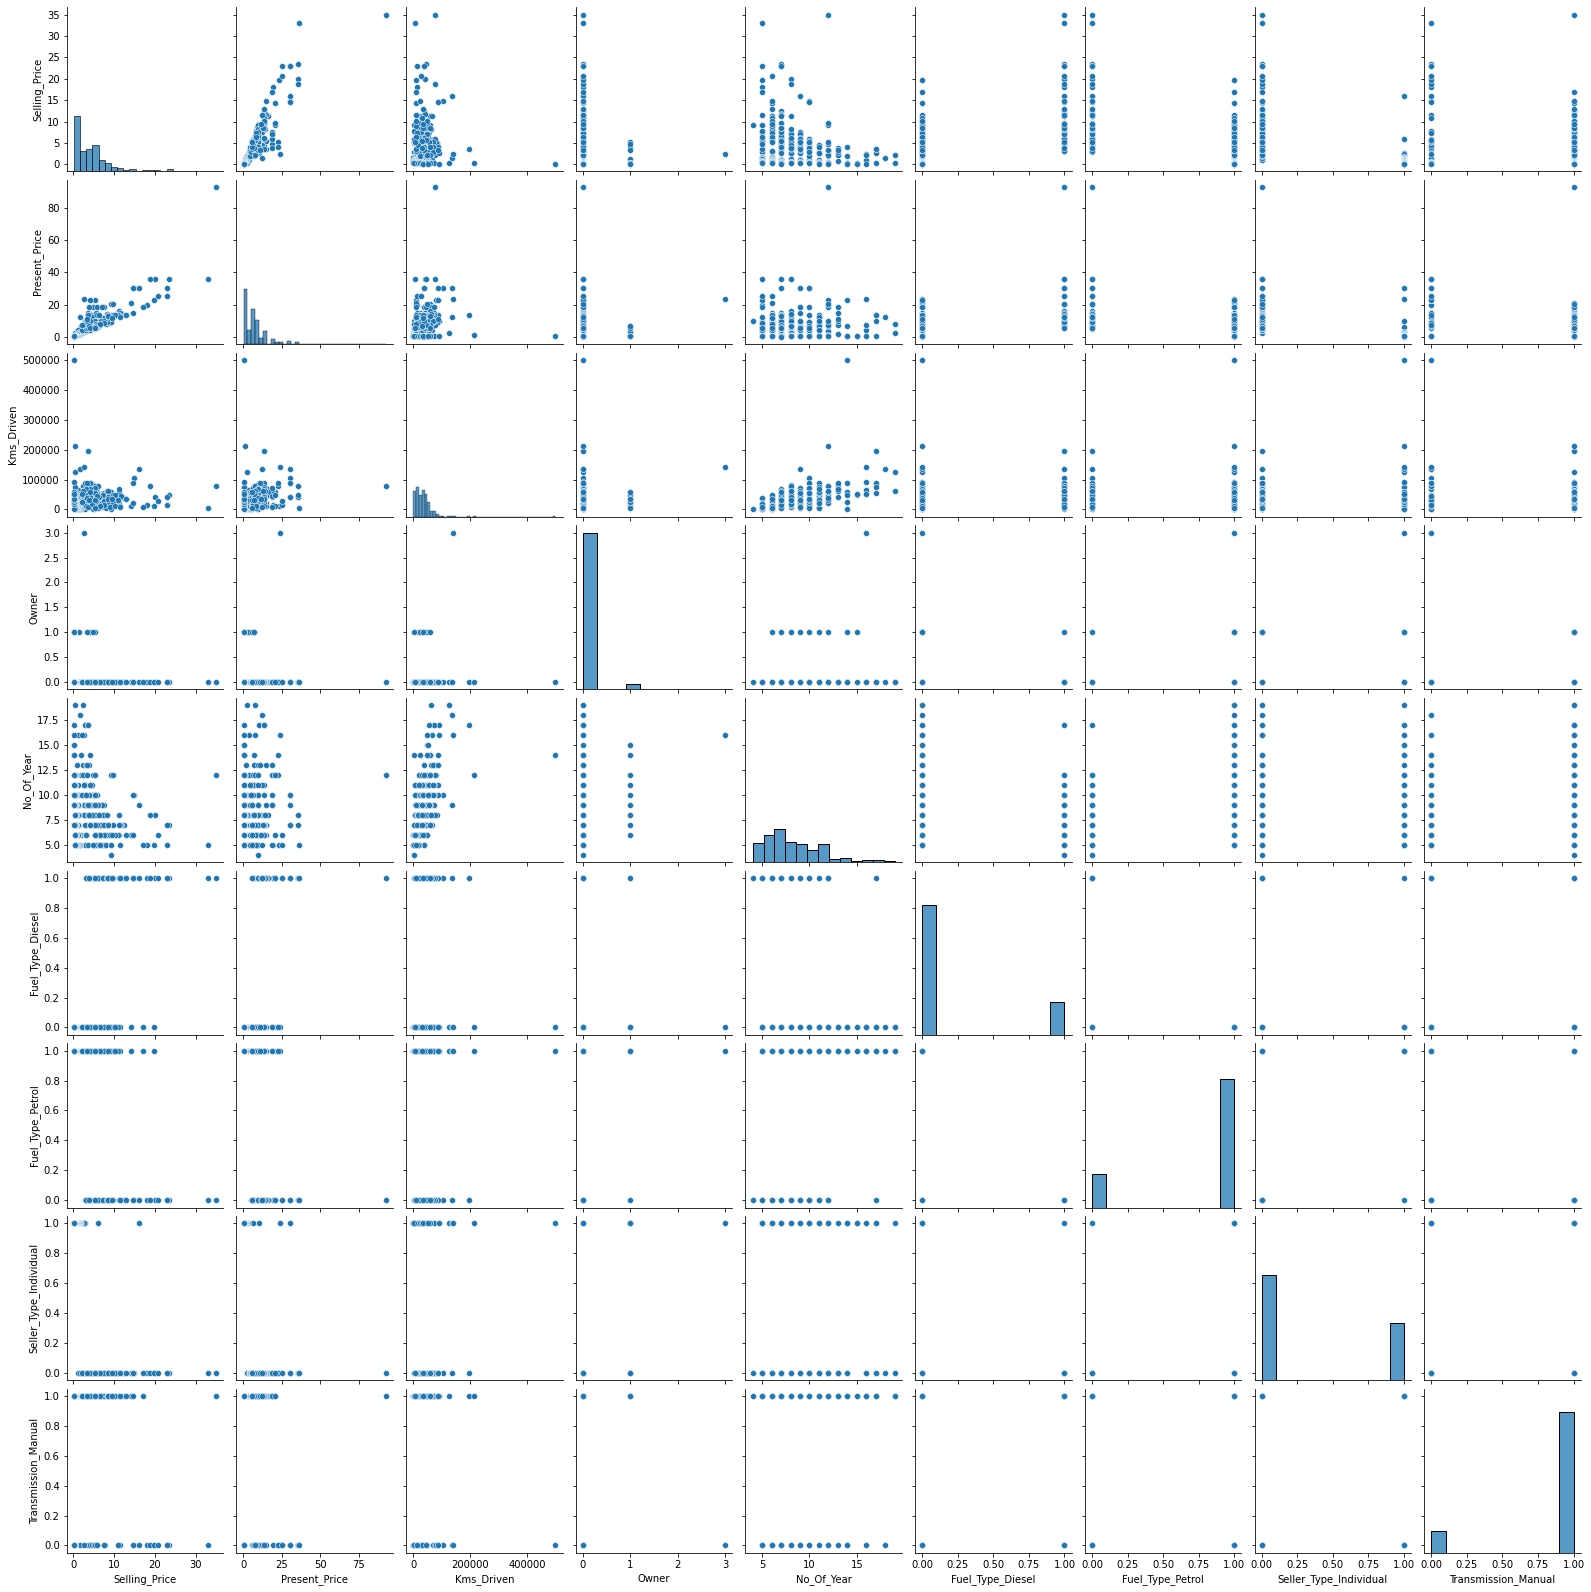

In [21]:
sns.pairplot(dataset)

As pairplot doesn't shows a lot we matplotlib

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# This makes sure the plot gets printeed even if plt.show is not used

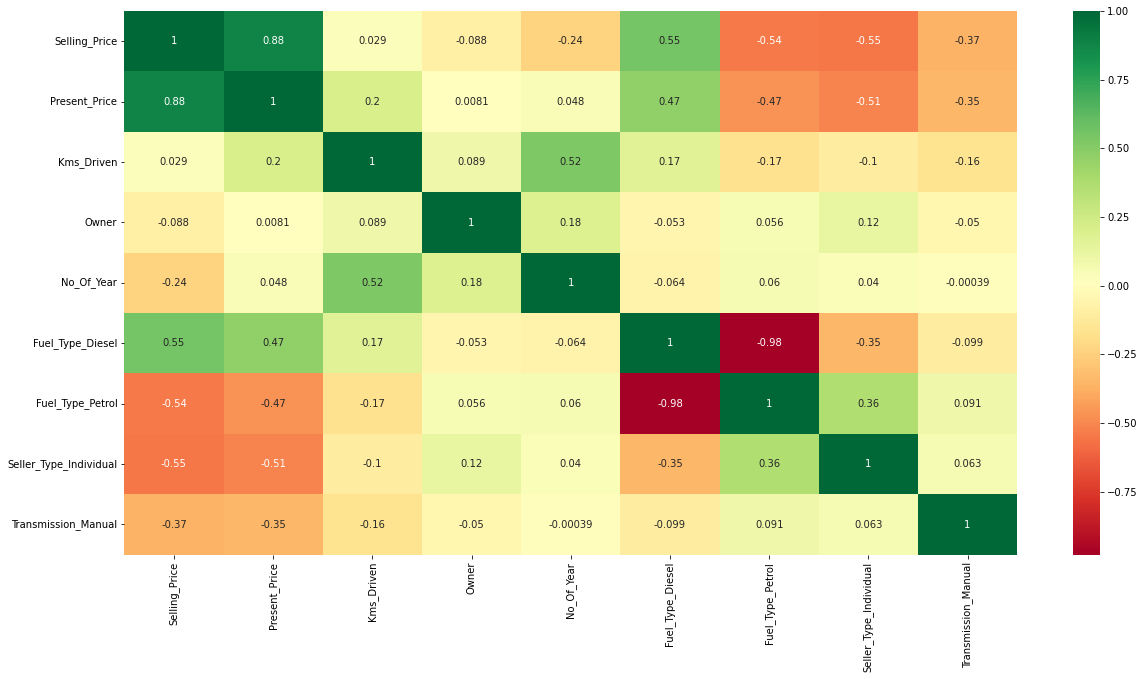

In [23]:
cormat = dataset.corr()
top_corr_features = cormat.index
plt.figure(figsize = (20, 10))
g = sns.heatmap(dataset[top_corr_features].corr(),annot = True, cmap  = "RdYlGn")      #Plot Heat Map

In [24]:
X = dataset.iloc[ : , 1: ]
y = dataset.iloc[ : , 0]

In [25]:
X.head()

,Present_Price,Kms_Driven,Owner,No_Of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [26]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [27]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [28]:
print(model.feature_importances_)

[4.23607595e-01 3.90921720e-02 2.60297294e-04 8.08356016e-02
 1.93324840e-01 1.78820435e-02 1.24205288e-01 1.20792162e-01]


## Plot Graph of Feature Importances for Better Visualisation

<AxesSubplot:>

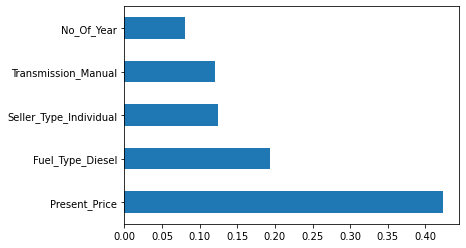

In [29]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
# kind = 'barh' means horizontal bar graph
feat_importances.nlargest(5).plot(kind = 'barh')   # Top 5 largest feature

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [32]:
#parameters = { 'n_estimators' : [ int(x) for x in range(100, 1300, 100) ]}
parameters = { 
    'n_estimators' : [ int(x) for x in np.linspace(start = 100 , stop = 1200, num = 12)], 
    'max_depth' :  [int(x) for x in np.linspace(5, 30, num =6)],
    'min_samples_split' : [2, 5, 10, 15, 100],
    'min_samples_leaf' : [1, 2, 5, 10]
    }
print(parameters)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


## Perform Random Search CV 

In [33]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator = regressor, param_distributions = parameters, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42)

In [34]:
rand_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=  13.3s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   7.7s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   9.0s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   8.7s
[CV] END max_depth=25, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   9.4s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.7s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.7s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.5s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.3s
[CV] END max_depth=2

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [35]:
y_pred = rand_search.predict(X_test)

In [36]:
y_pred

array([ 6.95918029,  0.51195961,  4.87224351,  8.57397828, 13.84595417,
        5.25897341,  3.28100875,  0.44415453,  3.92123391,  4.99667227,
        2.89444116,  0.69585705,  5.00918961,  7.25147024,  7.57084157,
       13.94980102,  6.86515274,  4.07678179,  0.46576625,  1.51051588,
        3.17340112,  5.13298014,  5.35921733,  9.94878824,  0.20428198,
        0.72751265,  0.30576696,  0.67103746,  0.49492952,  4.48500781,
        2.76913969,  5.87580416,  0.50208955,  7.19247462,  3.21162614,
        1.1439372 ,  5.77836222,  5.47133253,  0.22721104,  7.93944604,
        8.017258  , 22.14685816,  5.03864585,  4.4698829 ,  5.62819687,
       10.53609546,  0.24890123,  0.77701207,  5.40519197,  6.57768995,
        6.76079052,  3.05000081,  5.32596032, 22.1524458 ,  1.14876559,
        1.13665792,  0.4330927 ,  2.598637  ,  3.55041167,  2.54148741,
        4.19819353])

In [41]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9465802612661187


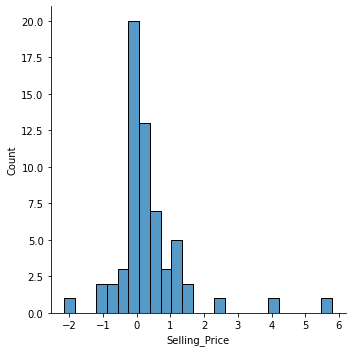

In [42]:
sns.displot(y_test-y_pred)

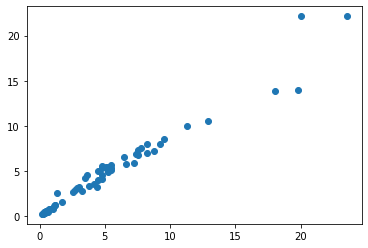

In [43]:
plt.scatter(y_test, y_pred)

In [44]:
import pickle

# Open a file where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# Dump  information to that file
pickle.dump(rand_search, file)